1 Importing libraries 

In [2]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
#Data Exploration

#We are now Exploring Categorical Variable

# Loan ID
df.Loan_ID.value_counts(dropna=False)
     


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [8]:
# Gender
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

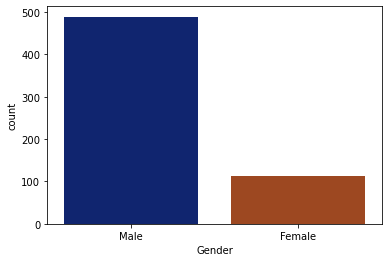

In [9]:
sns.countplot(x="Gender", data=df, palette="dark")
plt.show()

In [10]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Male applicant Percentage: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Female applicant Percentage: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Male applicant Percentage: 79.64%
Female applicant Percentage: 18.24%
Missing values percentage: 2.12%


Hence, Male applicant is higher as compared to female applicant and there are few missing values in this column also....

In [11]:
# Married
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

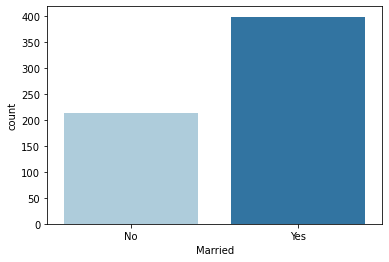

In [12]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

No. of applicant that has been married has higher compared to applicants not married and there is some missing value in the column also...

In [13]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Married Percentage: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Not married applicant Percentage: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Married Percentage: 64.82%
Not married applicant Percentage: 34.69%
Missing values percentage: 0.49%


In [14]:
# Education
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

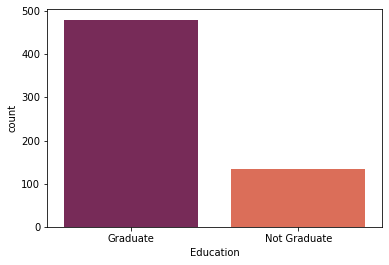

In [16]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [17]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Graduate applicant Percentage: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Not graduate applicant Percentage: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Graduate applicant Percentage: 78.18%
Not graduate applicant Percentage: 21.82%
Missing values percentage: 0.00%


No. of applicants has been graduated is higher compared to the applicants Not graduated....


In [18]:
# Self Employed
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

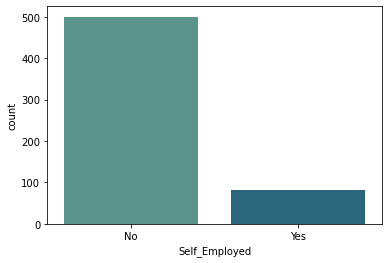

In [19]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [20]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Not self employed Percentage: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("self employed Percentage: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Not self employed Percentage: 81.43%
self employed Percentage: 13.36%
Missing values percentage: 5.21%


No. of applicants that are not self employed is higher compared to applicants that are self employed

In [21]:
# Credit History
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

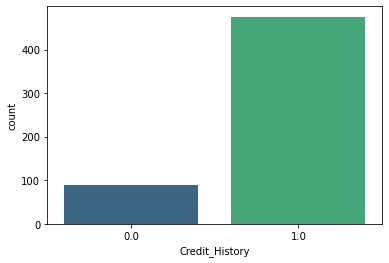

In [23]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [27]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


No. of applicants that have good credit history is higher compared to applicants that have bad credit history and there are some missing values in the column also...


In [28]:
# Property Area
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

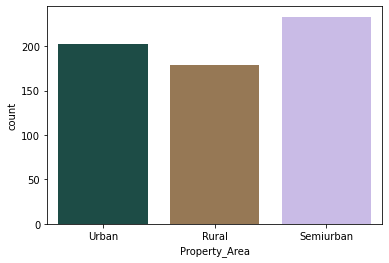

In [29]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [30]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Urban Percentage: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Rural Percentage: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Semiurban Percentage: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Urban Percentage: 32.90%
Rural Percentage: 29.15%
Semiurban Percentage: 37.95%
Missing values percentage: 0.00%


column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value

In [31]:
# Loan Status
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

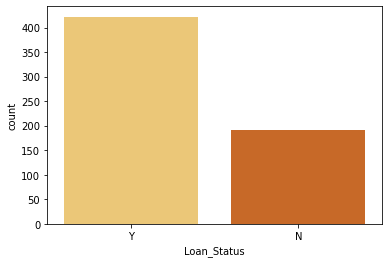

In [32]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [33]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


The number of approved loans is higher compared to rejected loans and No missing value in the column

Numerical Variable

Next, Exploring Numerical Variable

In [35]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Distribution of Histogram Distribution

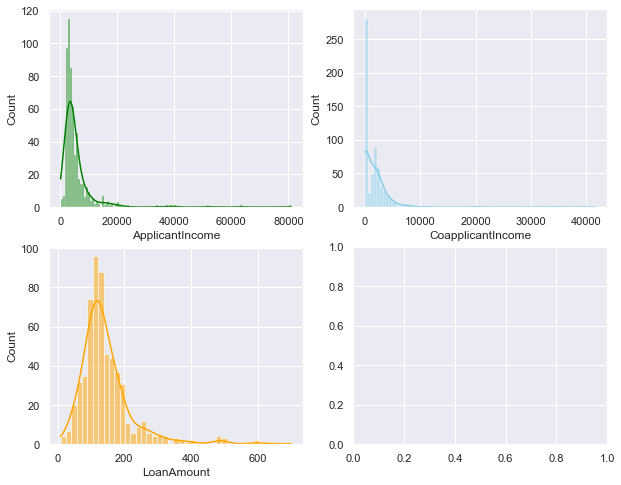

In [36]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Distribution of Violin Plot

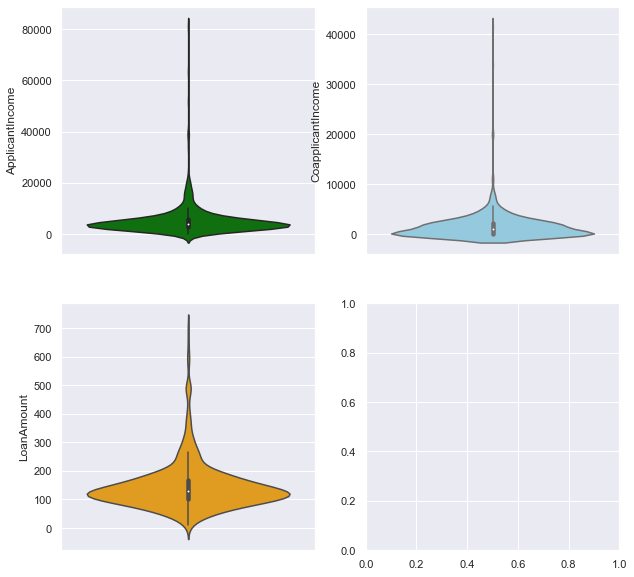

In [37]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of histogram and violin plot: Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers

The distribution of Loan Amount Term is negativly skewed and it has outliers

Categorical - Numerical

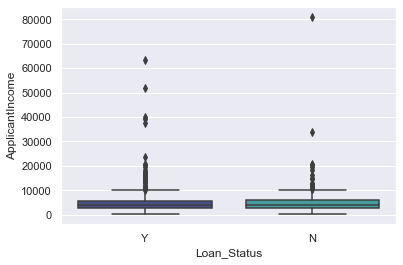

In [38]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

Can be seen that there are lots of outliers in Applicant Income

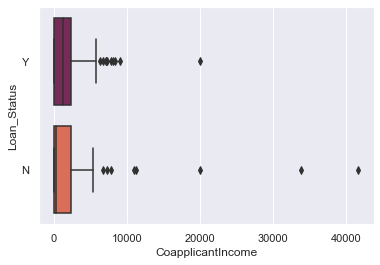

In [39]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

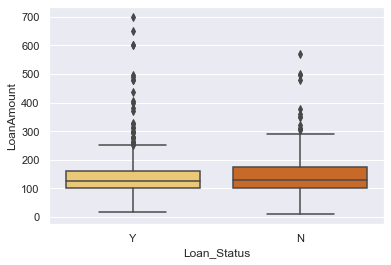

In [40]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

Checking Null Values

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

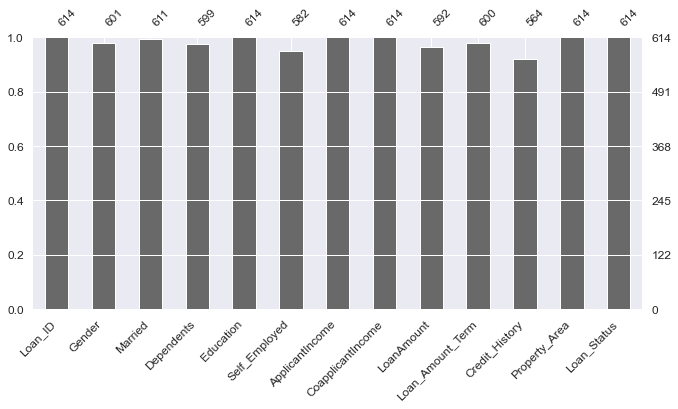

In [42]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

Data Preprocessing

Drop Unecessary Variables

In [43]:
df = df.drop(['Loan_ID'], axis = 1)

Data Imputation

Categorical Variables : This imputation for categorical variables will be performed using mode.


In [45]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

Numerical Variables : This imputation for numerical variables using mean.

In [46]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

One-hot Encoding

In [47]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True) 

Remove Outliers & Infinite values: Since there are outliers, the outliers will be removed.

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Skewed Distribution Treatment : Distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed. I will use square root transformation to normalized the distribution.

In [49]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

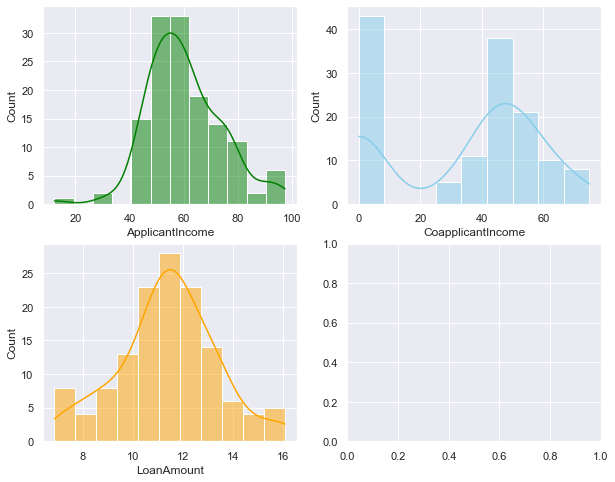

In [50]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Features Separating: Dependent features (Loan_Status) will be seperated from independent features.

In [51]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

SMOTE Technique : The number between approved and rejected loan is imbalanced. So, Oversampling technique will be used to avoid overfitting,

In [52]:
X, y = SMOTE().fit_resample(X, y)

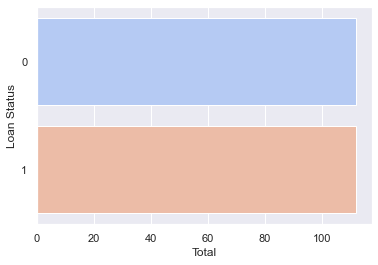

In [53]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

the distrubtion of Loan status are now balanced.

Data Normalization : It performed to normalize the range of independent variables or features of data.

In [54]:
X = MinMaxScaler().fit_transform(X)

In [55]:
#Splitting Data Set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Models :

1. Logistic Regression


In [56]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.79      0.86      0.83        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

[[18  5]
 [ 3 19]]
LR accuracy: 82.22%


In [ ]:
2. Random Forest

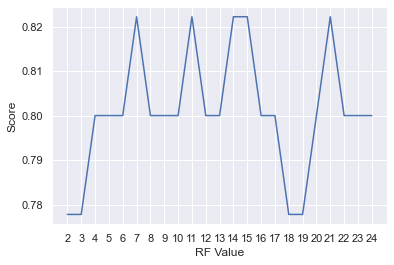

Random Forest Accuracy:  82.22%


In [57]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

3. Gradient Boosting:

In [59]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [60]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [61]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=50, subsample=1)
0.8159722222222221
{'subsample': 1, 'n_estimators': 100, 'max_leaf_nodes': 50, 'max_depth': 4}
5


In [62]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.89      0.77      0.83        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

[[21  2]
 [ 5 17]]
Gradient Boosting accuracy: 84.44%


Model Comparison

In [63]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Gradient Boost,84.444444
0,Logistic Regression,82.222222
1,Random Forest,82.222222


Plotting Model Comparison:

<AxesSubplot:xlabel='Model'>

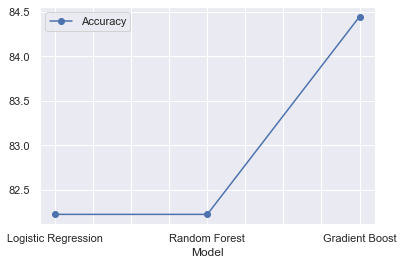

In [65]:
compare.plot(x='Model', y='Accuracy', kind='line', marker='o')

As We Seen, Among all model Random Forest had acheived the highest accuracy is 88.89%.